<a href="https://colab.research.google.com/github/Caroline-Camargo/TrabalhosFerramentasDeInteligenciaArtificial/blob/main/Tarefa2_Aprendizado_de_M%C3%A1quina_Classifica%C3%A7%C3%A3o_Caroline_Souza_Camargo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Baixar dataset

In [ ]:
!pip install gdown -qqq

In [ ]:
!gdown https://drive.google.com/uc?id=16OWdq_ebnlmF7xr5JZc4NzRTRAuthoa5

Downloading...
From: https://drive.google.com/uc?id=16OWdq_ebnlmF7xr5JZc4NzRTRAuthoa5
To: /content/cars-india-dataset.csv
100% 20.6k/20.6k [00:00<00:00, 25.5MB/s]


In [ ]:
import pandas as pd
import numpy as np

## Carregar e visualizar conjunto de dados
Material de apoio:
- https://www.w3schools.com/python/pandas/pandas_csv.asp
- https://pandas.pydata.org/docs/user_guide/10min.html#viewing-data

In [ ]:
df = pd.read_csv('cars-india-dataset.csv')

df.head()

,Model,Maker,Type,Seats,Displacement,Length,Width,Height,Wheelbase,No_of_Cylinders,...,Rear Brake,Drive,Turning Radius,Fuel Tank Capacity,Boot Space,Fuel Efficiency,Emission Type,Tyre Size,Variants,NCAP Rating
0,Virtus,Volkswagen,Sedan,5,999.0,4561,1752,1507,2651,3.0,...,Drum,2WD,5.05,45.0,521.0,19.40,BS VI,205/55 R16,3,Not Tested
1,Virtus,Volkswagen,Sedan,5,999.0,4561,1752,1507,2651,3.0,...,Drum,2WD,5.05,45.0,521.0,18.12,BS VI,205/55 R16,2,Not Tested
2,Virtus,Volkswagen,Sedan,5,1498.0,4561,1752,1507,2651,4.0,...,Drum,2WD,5.05,45.0,521.0,18.67,BS VI,205/55 R16,1,Not Tested
3,Taigun,Volkswagen,Mid Size SUV,5,999.0,4221,1760,1612,2651,3.0,...,Drum,2WD,5.05,50.0,385.0,19.20,BS VI,205/55 R17,3,5
4,Taigun,Volkswagen,Mid Size SUV,5,999.0,4221,1760,1612,2651,3.0,...,Drum,2WD,5.05,50.0,385.0,17.23,BS VI,205/55 R17,2,5


In [ ]:
df.shape

(156, 24)

In [ ]:
df.columns

Index(['Model', 'Maker', 'Type', 'Seats', 'Displacement', 'Length', 'Width',
       'Height', 'Wheelbase', 'No_of_Cylinders', 'Fuel', 'Engine Type',
       'Transmission', 'Front Brake', 'Rear Brake', 'Drive', 'Turning Radius',
       'Fuel Tank Capacity', 'Boot Space', 'Fuel Efficiency', 'Emission Type',
       'Tyre Size', 'Variants', 'NCAP Rating'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Model               156 non-null    object 
 1   Maker               156 non-null    object 
 2   Type                156 non-null    object 
 3   Seats               156 non-null    int64  
 4   Displacement        155 non-null    float64
 5   Length              156 non-null    int64  
 6   Width               156 non-null    int64  
 7   Height              156 non-null    int64  
 8   Wheelbase           156 non-null    int64  
 9   No_of_Cylinders     155 non-null    float64
 10  Fuel                156 non-null    object 
 11  Engine Type         156 non-null    object 
 12  Transmission        155 non-null    object 
 13  Front Brake         156 non-null    object 
 14  Rear Brake          156 non-null    object 
 15  Drive               156 non-null    object 
 16  Turning 

In [ ]:
df.isnull().sum()

Model                  0
Maker                  0
Type                   0
Seats                  0
Displacement           1
Length                 0
Width                  0
Height                 0
Wheelbase              0
No_of_Cylinders        1
Fuel                   0
Engine Type            0
Transmission           1
Front Brake            0
Rear Brake             0
Drive                  0
Turning Radius        19
Fuel Tank Capacity     1
Boot Space            15
Fuel Efficiency       23
Emission Type          1
Tyre Size              0
Variants               0
NCAP Rating            0
dtype: int64

In [ ]:
np.unique(df['NCAP Rating'])

array(['0', '2', '3', '4', '5', '6', 'Not Rated', 'Not Tested'],
      dtype=object)

In [ ]:
df.describe()

,Seats,Displacement,Length,Width,Height,Wheelbase,No_of_Cylinders,Turning Radius,Fuel Tank Capacity,Boot Space,Fuel Efficiency,Variants
count,156.000000,155.000000,156.000000,156.000000,156.000000,156.000000,155.000000,137.000000,155.000000,141.000000,133.000000,156.000000
mean,5.538462,1598.109677,4324.455128,1800.512821,1653.666667,2633.358974,3.870968,5.247080,48.725806,377.673759,18.028947,2.871795
std,1.018440,504.656969,325.767389,79.050452,125.170559,128.228372,0.389966,0.284181,10.997815,105.015951,3.273723,2.864055
min,2.000000,799.000000,3731.000000,1579.000000,1370.000000,2422.000000,3.000000,4.700000,28.000000,180.000000,9.000000,1.000000
25%,5.000000,1197.000000,3995.000000,1751.500000,1544.000000,2500.000000,4.000000,5.100000,40.000000,296.000000,16.200000,1.000000
50%,5.000000,1493.000000,4315.000000,1790.000000,1631.000000,2610.000000,4.000000,5.200000,50.000000,392.000000,18.100000,2.000000
75%,6.000000,1999.000000,4598.000000,1855.000000,1755.000000,2750.000000,4.000000,5.300000,57.000000,447.000000,20.250000,3.000000
max,9.000000,3799.000000,5115.000000,2099.000000,1995.000000,3060.000000,6.000000,5.900000,80.000000,625.000000,28.000000,20.000000


# Pré-Processamento de Dados
## Tratamento dos dados
Antes de preencher valores faltantes, divida seus dados em conjuntos de treino e teste. Calcule estatísticas apenas no conjunto de treino e use-as para preencher os valores faltantes em ambos os conjuntos. Isso impede vazamento de informações do teste para o treino.

Materiais de apoio:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://www.freecodecamp.org/news/data-cleaning-and-preprocessing-with-pandasbdvhj/#how-to-handle-missing-values
- https://scikit-learn.org/stable/common_pitfalls.html



In [ ]:
from sklearn.model_selection import train_test_split

X = ['Maker', 'Type', 'Seats', 'Displacement', 'Length', 'Width',
       'Height', 'Wheelbase', 'No_of_Cylinders', 'Fuel', 'Engine Type',
       'Transmission', 'Front Brake', 'Rear Brake', 'Drive', 'Turning Radius',
       'Fuel Tank Capacity', 'Boot Space', 'Fuel Efficiency', 'Emission Type',
       'Tyre Size', 'Variants', 'NCAP Rating']
y = ['Model']

X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.30)
X_train.shape

(109, 23)

### Lidando com valores ausentes

In [ ]:
X_train.isnull().sum()

Maker                  0
Type                   0
Seats                  0
Displacement           1
Length                 0
Width                  0
Height                 0
Wheelbase              0
No_of_Cylinders        1
Fuel                   0
Engine Type            0
Transmission           1
Front Brake            0
Rear Brake             0
Drive                  0
Turning Radius        14
Fuel Tank Capacity     1
Boot Space            11
Fuel Efficiency       16
Emission Type          1
Tyre Size              0
Variants               0
NCAP Rating            0
dtype: int64

No momento do tratamento de dados nulos no conjunto de teste foi tomado cuidado para que as informações preenchidas no conjunto de teste fossem derivadas exclusivamente do conjunto de treinamento (para evitar o vazamento de dados)

Vale ressaltar que para as colunas Cilindrada do motor (Displacement) e Número de cilindros do motor (No_of_Cylinders) foi preenchido de acordo com o Tipo do motor do veículo (Engine Type), pois acredito que o tipo de motor deva influenciar nesses atributos. Já para os outros atributos adotei o critério que para váriáveis categóricas preencho com a moda e para as restantes com a média




In [ ]:
def calc_moda_subgrupo(X_train, value, columFilter, columModa):
  linhas_filtradas = X_train[X_train[columFilter] == value]
  moda = linhas_filtradas[columModa].mode()
  return moda.iloc[0] if not moda.empty else None

def calc_media_subgrupo(X_train, value, columFilter, columMedia):
  linhas_filtradas = X_train[X_train[columFilter] == value]
  media = linhas_filtradas[columMedia].mean()
  return media

def preencher_valores_com_moda_subgrupo(df_x, df_y, X_train, columModa, columFilter): # Preenche valores ausentes com a moda específica de um subgrupo de uma coluna do dataset
  id_linhas_nulas = df_x[df_x[columModa].isnull()].index
  for i in id_linhas_nulas:
    value = df_x.loc[i, columFilter]
    moda = calc_moda_subgrupo(X_train, value, columFilter, columModa)
    if moda is None:
      df_x = df_x.drop(i)
      df_y = df_y.drop(i)
    else:
      df_x.loc[i, columModa] = moda
  return df_x, df_y

def preencher_valores_com_media_subgrupo(df_x, df_y, X_train, columMedia, columFilter): # Preenche valores ausentes com a média específica de um subgrupo de uma coluna do dataset
  id_linhas_nulas = df_x[df_x[columMedia].isnull()].index
  for i in id_linhas_nulas:
    value = df_x.loc[i, columFilter]
    media = calc_media_subgrupo(X_train, value, columFilter, columMedia)
    if pd.isna(media):
      df_x = df_x.drop(i)
      df_y = df_y.drop(i)
    else:
      df_x.loc[i, columMedia] = media
  return df_x, df_y

def tratando_valores_ausentes(df_x, df_y, X_train):
  isTeste = False
  if df_x.equals(X_train):
    isTeste = True

  colunas_nulas = df_x.isnull().sum()
  colunas_nulas = colunas_nulas[colunas_nulas > 0].index
  for column_name in colunas_nulas:
    if column_name == 'Displacement':
      df_x, df_y = preencher_valores_com_media_subgrupo(df_x, df_y, X_train, column_name, 'Engine Type')
    elif column_name == 'No_of_Cylinders':
      df_x, df_y = preencher_valores_com_moda_subgrupo(df_x, df_y, X_train, column_name, 'Engine Type')
    elif df[column_name].dtype == 'object':
      df_x[column_name].fillna(X_train[column_name].mode()[0], inplace=True)
    else:
      if column_name in ['Seats', 'Variants']:
        df_x[column_name].fillna(X_train[column_name].mode()[0], inplace=True)
      else:
        df_x[column_name].fillna(X_train[column_name].mean(), inplace=True)

    if not isTeste:
        X_train = df_x
  return df_x, df_y

X_train, y_train = tratando_valores_ausentes(X_train, y_train, X_train)
X_test, y_test = tratando_valores_ausentes(X_test, y_test, X_train)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 45 to 143
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Maker               108 non-null    object 
 1   Type                108 non-null    object 
 2   Seats               108 non-null    int64  
 3   Displacement        108 non-null    float64
 4   Length              108 non-null    int64  
 5   Width               108 non-null    int64  
 6   Height              108 non-null    int64  
 7   Wheelbase           108 non-null    int64  
 8   No_of_Cylinders     108 non-null    float64
 9   Fuel                108 non-null    object 
 10  Engine Type         108 non-null    object 
 11  Transmission        108 non-null    object 
 12  Front Brake         108 non-null    object 
 13  Rear Brake          108 non-null    object 
 14  Drive               108 non-null    object 
 15  Turning Radius      108 non-null    float64
 16  Fuel Tank Ca

In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 45 to 143
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Model   108 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


### Lidando com registros duplicados

In [ ]:
def removing_duplicate_rows(df_x, df_y):
  if df_x.duplicated().sum() > 0:
    df_x = df_x.drop_duplicates()
    df_y = df_y.loc[df_x.index]
  return df_x, df_y

X_train, y_train= removing_duplicate_rows(X_train, y_train)
X_test, y_test = removing_duplicate_rows(X_test, y_test)

### Lidando com colunas constantes

In [ ]:
def removing_constant_columns(df_train, df_test):
  constant_columns = [col for col in df_train.columns if df_train[col].nunique() == 1]
  df_train = df_train.drop(columns=constant_columns)
  df_test = df_test.drop(columns=constant_columns)
  return df_train, df_test

X_train, X_test = removing_constant_columns(X_train, X_test)

## Transformação dos dados
Novamente, deve-se tomar cuidado com o vazamento de dados. O último link fornecido aqui demonstra como realizar transformações sem ocorrer vazamento de dados.

Material de apoio:
- https://medium.com/@meritshot/standardization-v-s-normalization-6f93225fbd84#:~:text=Standardization%2C%20interestingly%2C%20refers%20to%20setting,data%20onto%20the%20unit%20sphere.
- https://www.shiksha.com/online-courses/articles/normalization-and-standardization/
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://machinelearningmastery.com/data-preparation-without-data-leakage/

### Conversão de tipo de dados

Analizando o contexto e a natureza dos dados espera-se que os tipos de dados para cada coluna do dataset sejam essas:
*   Object (categórico): Model, Maker, Type, Fuel, Engine Type, Transmission, Rear Brake, Drive, Emission Type, 'NCAP Rating', Tyre Size, Variants.
*   Inteiro: Seats, No_of_Cylinders.
*   Float: Displacement, Length, Width, Height, Wheelbase, Turning Radius, Fuel Tank Capacity, Boot Space, Fuel Efficiency.


In [ ]:
X_train.dtypes

Maker                  object
Type                   object
Seats                   int64
Displacement          float64
Length                  int64
Width                   int64
Height                  int64
Wheelbase               int64
No_of_Cylinders       float64
Fuel                   object
Engine Type            object
Transmission           object
Rear Brake             object
Drive                  object
Turning Radius        float64
Fuel Tank Capacity    float64
Boot Space            float64
Fuel Efficiency       float64
Emission Type          object
Tyre Size              object
Variants                int64
NCAP Rating            object
dtype: object

As colunas que necessitam de transformações são:


float -> int: No_of_Cylinders


int -> float: Length, Width, Height, Wheelbase,

In [ ]:
def data_transformation1(df):
  for column in df.columns:
    if df[column].dtype != 'int64' and column in ['No_of_Cylinders', 'Seats']:
      df[column] = df[column].astype('int64')
    if df[column].dtype != 'float64' and column in ['Displacement', 'Length', 'Width', 'Height', 'Wheelbase', 'Turning Radius', 'Fuel Tank Capacity', 'Boot Space', 'Fuel Efficiency']:
      df[column] = df[column].astype('float64')
    if df[column].dtype != 'object' and column in ['Model', 'Maker', 'Type', 'Fuel', 'Engine Type', 'Transmission', 'Rear Brake', 'Drive', 'Emission Type', 'Tyre Size',  'NCAP Rating', 'Variants']:
      df[column] = df[column].astype('object')
  return df

X_train = data_transformation1(X_train)
X_test = data_transformation1(X_test)
X_train.dtypes

Maker                  object
Type                   object
Seats                   int64
Displacement          float64
Length                float64
Width                 float64
Height                float64
Wheelbase             float64
No_of_Cylinders         int64
Fuel                   object
Engine Type            object
Transmission           object
Rear Brake             object
Drive                  object
Turning Radius        float64
Fuel Tank Capacity    float64
Boot Space            float64
Fuel Efficiency       float64
Emission Type          object
Tyre Size              object
Variants               object
NCAP Rating            object
dtype: object

### Codificação de variáveis ​​categóricas

In [ ]:
def data_transformation2(df):
  df = pd.get_dummies(df, drop_first=True, columns=['Maker', 'Type', 'Fuel', 'Engine Type', 'Transmission', 'Rear Brake', 'Drive', 'Emission Type', 'Tyre Size',  'NCAP Rating', 'Variants'])
  return df

X_train = data_transformation2(X_train)
X_test = data_transformation2(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

### Normalização dos dados

Foi utilizado a normalização porque a distribuição dos dados não é conhecida

*   A padronização é preferida para algoritmos que são sensíveis à escala de recursos ou assumem normalidade, como regressão logística
*   Máquinas de vetores de suporte, enquanto a normalização é mais adequada para algoritmos baseados em distância, como k-vizinhos mais próximos (KNN).


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def data_transformation3(df_train, df_test):
  scaler = MinMaxScaler()
  scaler.fit(df_train)
  df_train = scaler.transform(df_train)
  df_test = scaler.transform(df_test)
  return df_train, df_test

X_train, X_test = data_transformation3(X_train, X_test)

In [ ]:
X_train, X_test = pd.DataFrame(X_train), pd.DataFrame(X_test)

## Treinamento dos modelos


### Árvore de Decisão
Material de apoio:
-  https://scikit-learn.org/stable/modules/tree.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)

<ipython-input-85-bf2cc0acca41>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


### Máquina de Suporte de Vetores
Material de apoio:
- https://scikit-learn.org/stable/modules/svm.html

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_preds = svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### KNN
Material de apoio:
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train, y_train)
k_neighbors_preds = k_neighbors.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Métricas de Avaliação
Para avaliar adequadamente o desempenho do modelo de classificação, é essencial calcular e analísar algumas métricas, tais como: acurácia, precisão, recall e F1-score. Além disso, a construção de uma matriz de confusão é fundamental para uma visualização mais clara e detalhada do desempenho dos modelos em questão.

Depois de treinar os três modelos, analise os resultados alcançados e discuta qual deles, em sua opinião, obteve os melhores desempenhos.

Material de apoio:
- https://medium.com/@impythonprogrammer/evaluation-metrics-for-classification-fc770511052d
- https://github.com/H2IA/escola-de-verao-2021/blob/main/notebooks/colab/M%C3%A9tricas.ipynb

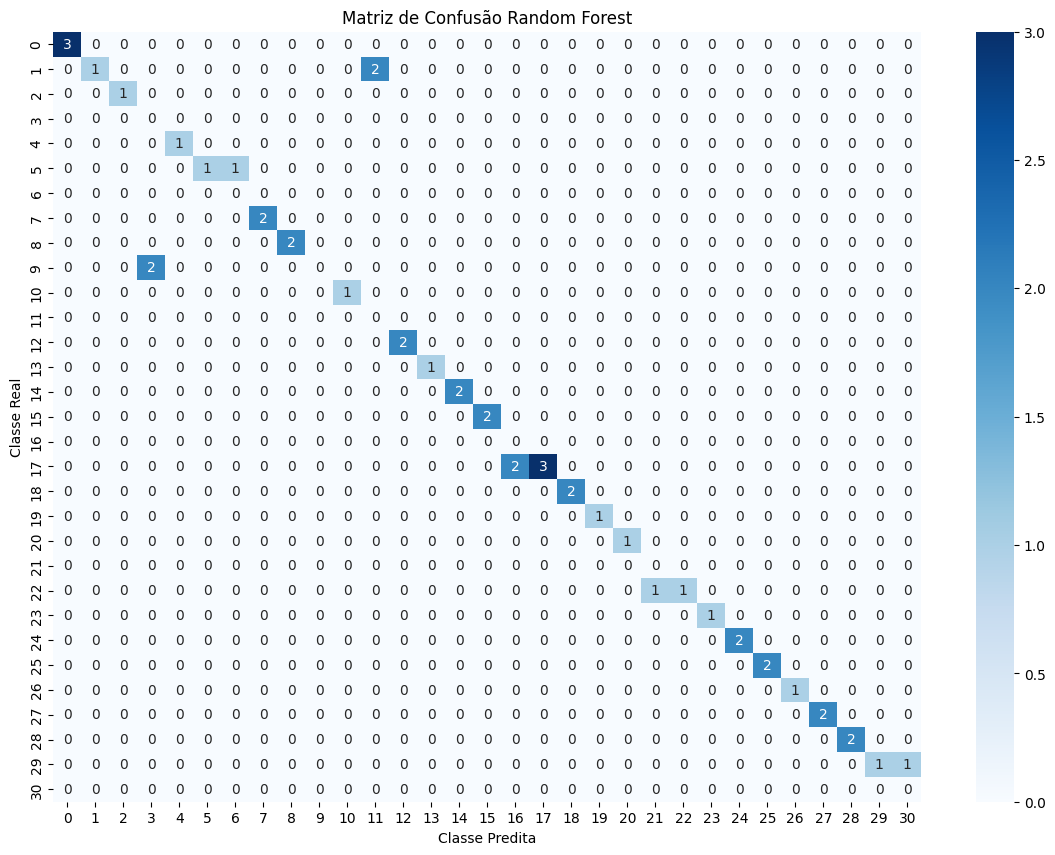

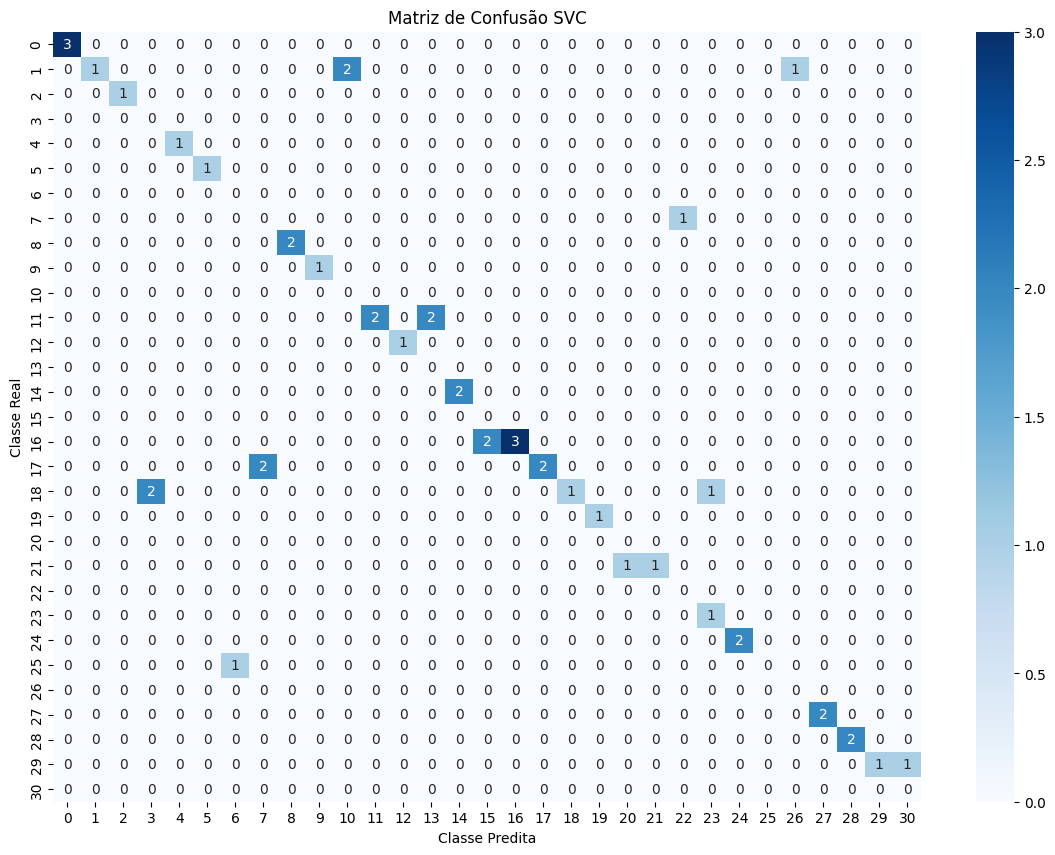

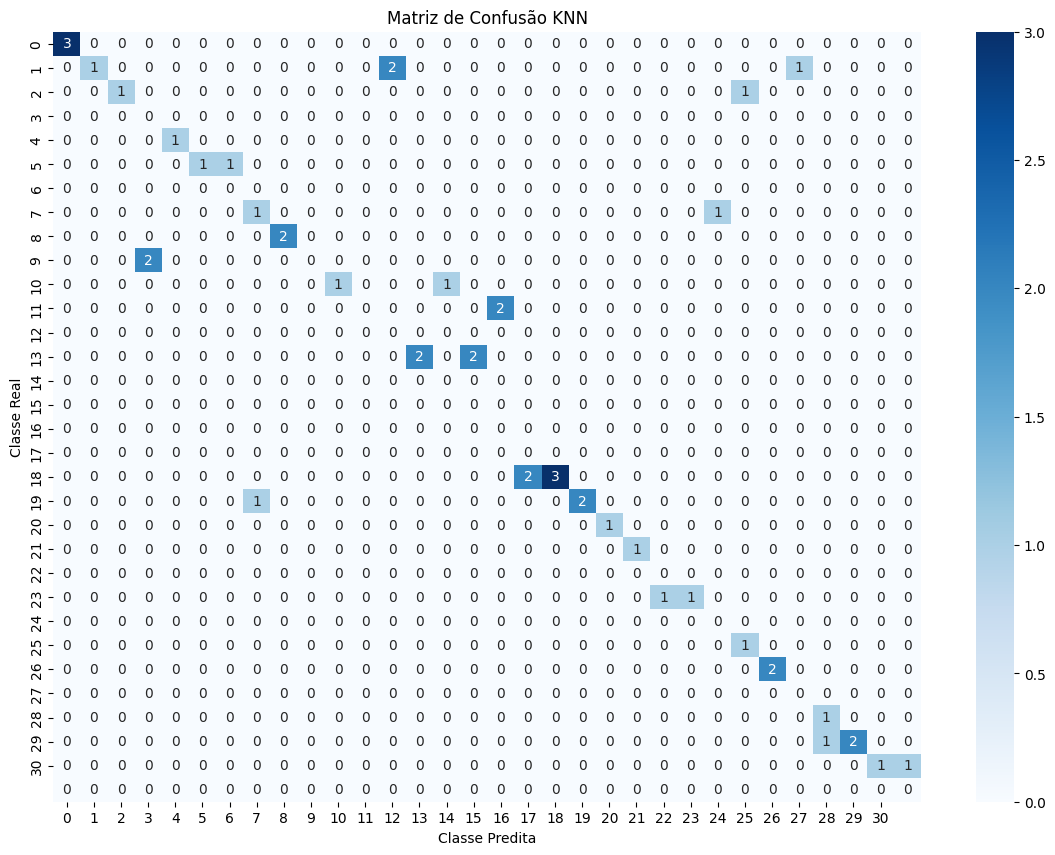

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def matrix(confusionMatrix, name):
    plt.figure(figsize=(14, 10))
    sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(31), yticklabels=range(31))
    plt.title(f'Matriz de Confusão {name}')
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Real')
    plt.show()

confusionMatrix = confusion_matrix(np.array(random_forest_preds), y_test)
matrix(confusionMatrix, "Random Forest")

confusionMatrix = confusion_matrix(np.array(svc_preds), y_test)
matrix(confusionMatrix, "SVC")

confusionMatrix = confusion_matrix(np.array(k_neighbors_preds), y_test)
matrix(confusionMatrix, "KNN")


Os valores na diagonal da matriz de confusão representam o número de instâncias que foram corretamente classificadas pelo modelo. Enquanto que os valores fora da diagonal indicam erros de classificação. Percebe-se que a matriz mostra que a maioria das instâncias foi corretamente classificada, mas há algumas exceções entre algumas classes. Esse valores fora da diagonal principal são mais visíveis para o SVC e o KNN, indicando uma maior taxa de erro em predizer essas classes

In [ ]:
print("Random Forest")
print(classification_report(y_test, random_forest_preds))

Random Forest
                 precision    recall  f1-score   support

        Alcazar       1.00      1.00      1.00         3
          Amaze       0.33      1.00      0.50         1
           Aura       1.00      1.00      1.00         1
             C3       0.00      0.00      0.00         2
       Carnival       1.00      1.00      1.00         1
   City 5th Gen       0.50      1.00      0.67         1
     City e-HEV       0.00      0.00      0.00         1
          Creta       1.00      1.00      1.00         2
       Fortuner       1.00      1.00      1.00         2
         Glanza       0.00      0.00      0.00         0
 Grand i10 Nios       1.00      1.00      1.00         1
           Jazz       0.00      0.00      0.00         2
          Kiger       1.00      1.00      1.00         2
           Kwid       1.00      1.00      1.00         1
        Magnite       1.00      1.00      1.00         2
         Safari       1.00      1.00      1.00         2
Scorpio Classic 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Observa-se que modelo Random Forest demonstra um bom desempenho geral com alta precisão, recall e F1-score para a maioria das categorias. No entanto, observa-se que em algumas classes com poucos exemplos, pois não há amostras pertencentes a essas classes no conjunto de teste, o que acaba influenciando na avaliação.

In [ ]:
print("Support Vector Machine")
print(classification_report(y_test, svc_preds))

Support Vector Machine
                 precision    recall  f1-score   support

        Alcazar       1.00      1.00      1.00         3
          Amaze       0.25      1.00      0.40         1
           Aura       1.00      1.00      1.00         1
             C3       0.00      0.00      0.00         2
       Carnival       1.00      1.00      1.00         1
   City 5th Gen       1.00      1.00      1.00         1
     City e-HEV       0.00      0.00      0.00         1
          Creta       0.00      0.00      0.00         2
       Fortuner       1.00      1.00      1.00         2
 Grand i10 Nios       1.00      1.00      1.00         1
           Jazz       0.00      0.00      0.00         2
          Kiger       0.50      1.00      0.67         2
           Kwid       1.00      1.00      1.00         1
        Magnite       0.00      0.00      0.00         2
         Safari       1.00      1.00      1.00         2
Scorpio Classic       0.00      0.00      0.00         2
      S

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Observa-se que o SVM mostra um desempenho pior na classificação multiclasse, com métricas de precisão, recall e F1-score médias de aproximadamente 0.48, 0.58 e 0.50, respectivamente. Isso indica dificuldades em prever corretamente várias classes, resultando em um número significativo de falsos positivos e uma sensibilidade variável para diferentes classes.

In [ ]:
print("KNN")
print(classification_report(y_test, k_neighbors_preds))

KNN
                 precision    recall  f1-score   support

        Alcazar       1.00      1.00      1.00         3
          Amaze       0.25      1.00      0.40         1
           Aura       0.50      1.00      0.67         1
             C3       0.00      0.00      0.00         2
       Carnival       1.00      1.00      1.00         1
   City 5th Gen       0.50      1.00      0.67         1
     City e-HEV       0.00      0.00      0.00         1
          Creta       0.50      0.50      0.50         2
       Fortuner       1.00      1.00      1.00         2
         Glanza       0.00      0.00      0.00         0
 Grand i10 Nios       0.50      1.00      0.67         1
        Harrier       0.00      0.00      0.00         0
           Jazz       0.00      0.00      0.00         2
          Kiger       0.50      1.00      0.67         2
           Kwid       0.00      0.00      0.00         1
        Magnite       0.00      0.00      0.00         2
         Safari       0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Em comparação com o SVM, o KNN apresenta métricas de desempenho semelhantes, com uma tendência a alcançar um recall um pouco melhor, mas com precisão inferior para várias classes. No entanto, quando comparado ao Random Forest, observa-se que o KNN possui um desempenho realmente inferior

Assim com base na análise conclui-se que devido ao desempenho superior das árvores de decisão em precisão e recall as árvores de decisão são as mais indicadas para esse problema. Já que é capaz de lidar bem com complexidade nos dados e classes desbalanceadas, oferecendo uma boa combinação de precisão e capacidade de generalização